In [1]:
import numpy as np
import pandas as pd
from pandas import IndexSlice as idx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.cm as cm
import winsound
from tslearn.clustering import TimeSeriesKMeans
from tslearn.metrics import cdist_dtw
from sklearn.metrics import silhouette_samples, silhouette_score

c:\Users\Michael\anaconda3\envs\timeseries\lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


# DBScan

## ESTAB

In [2]:
estab = pd.read_csv("../data/processed/SAMI/estab.csv", index_col=[0,1])
estab.head()

,,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Area Code,Area,,,,,,,,,,,,,,,,,,,,
45001,"Abbeville County, South Carolina",-1.787724,-1.889718,-1.804714,-1.918556,-1.724402,-1.582541,-1.458015,-1.750064,-1.805201,-1.740009,-1.750700,-1.772447,-1.813741,-1.717472,-1.772259,-1.766582,-1.911611,-1.784687,-1.695944,-1.711271
22001,"Acadia Parish, Louisiana",-0.513995,-0.597103,-0.752063,-0.784642,-0.785843,-0.788590,-0.749592,-0.718876,-0.630072,-0.510661,-0.467970,-0.462769,-0.472076,-0.478675,-0.577275,-0.576655,-0.574910,-0.535110,-0.505653,-0.484444
51001,"Accomack County, Virginia",-0.211780,-0.175765,-0.141844,-0.072816,-0.054836,0.042845,0.092403,0.283117,0.332909,0.315844,0.356866,0.313538,0.345128,0.355515,0.429025,0.717413,0.865955,0.896262,0.928966,0.842985
16001,"Ada County, Idaho",1.753417,1.796025,1.773206,1.805082,1.765476,1.739799,1.759248,1.758452,1.665592,1.593564,1.514829,1.406194,1.291041,1.262770,1.254608,1.229197,1.282384,1.340878,1.362160,1.247611
19001,"Adair County, Iowa",1.303426,1.211800,1.159938,1.167879,1.005763,0.662052,0.518451,0.419783,0.694227,0.628571,0.671968,0.626514,0.795433,0.849512,0.892026,1.003442,1.104464,1.056797,1.103206,1.190172


In [3]:
X = (estab.sub(estab.mean(axis=1), axis=0)).to_numpy()

Text(0, 0.5, 'Distance to kth Nearest Neighbour')

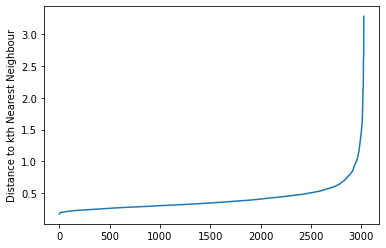

In [4]:
neighbors = NearestNeighbors(n_neighbors=40)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances, axis=0)
# print(distances)
distances = distances[:,-1]
plt.plot(list(range(distances.shape[0])),distances)
ax = plt.gca()
ax.set_ylabel("Distance to kth Nearest Neighbour")

Text(0, 0.5, 'Distance to kth Nearest Neighbour')

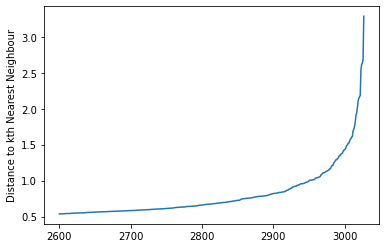

In [5]:
plt.plot(list(range(2600,distances.shape[0])), distances[2600:3100])
ax = plt.gca()
ax.set_ylabel("Distance to kth Nearest Neighbour")

In [6]:
clustering = DBSCAN(eps=1.25, min_samples=40).fit(X)
set(clustering.labels_.tolist())

{-1, 0}

In [7]:
(clustering.labels_==np.zeros(clustering.labels_.shape[0])).sum()/clustering.labels_.shape[0]

0.9953764861294584

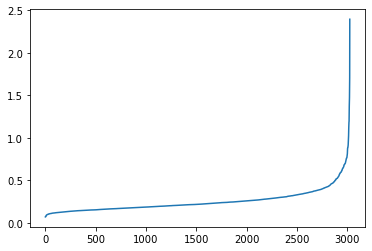

In [9]:
estab = pd.read_csv("../data/processed/SAMI/estab.csv")
neighbors = NearestNeighbors(n_neighbors=40)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

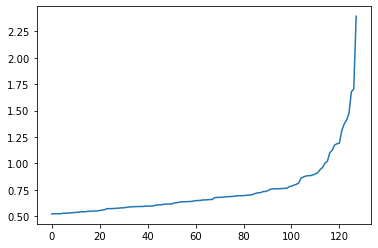

In [10]:
plt.plot(distances[2900:3100])

In [12]:
clustering = DBSCAN(eps=1.75, min_samples=40).fit(X)
set(clustering.labels_.tolist())

{-1, 0}

In [13]:
(clustering.labels_==np.zeros(clustering.labels_.shape[0])).sum()/clustering.labels_.shape[0]

0.9990092470277411

# Time Series Clustering

## ESTAB

In [14]:
estab = pd.read_csv("../data/processed/SAMI/estab.csv", index_col=[0,1])
estab

,,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Area Code,Area,,,,,,,,,,,,,,,,,,,,
45001,"Abbeville County, South Carolina",-1.787724,-1.889718,-1.804714,-1.918556,-1.724402,-1.582541,-1.458015,-1.750064,-1.805201,-1.740009,-1.750700,-1.772447,-1.813741,-1.717472,-1.772259,-1.766582,-1.911611,-1.784687,-1.695944,-1.711271
22001,"Acadia Parish, Louisiana",-0.513995,-0.597103,-0.752063,-0.784642,-0.785843,-0.788590,-0.749592,-0.718876,-0.630072,-0.510661,-0.467970,-0.462769,-0.472076,-0.478675,-0.577275,-0.576655,-0.574910,-0.535110,-0.505653,-0.484444
51001,"Accomack County, Virginia",-0.211780,-0.175765,-0.141844,-0.072816,-0.054836,0.042845,0.092403,0.283117,0.332909,0.315844,0.356866,0.313538,0.345128,0.355515,0.429025,0.717413,0.865955,0.896262,0.928966,0.842985
16001,"Ada County, Idaho",1.753417,1.796025,1.773206,1.805082,1.765476,1.739799,1.759248,1.758452,1.665592,1.593564,1.514829,1.406194,1.291041,1.262770,1.254608,1.229197,1.282384,1.340878,1.362160,1.247611
19001,"Adair County, Iowa",1.303426,1.211800,1.159938,1.167879,1.005763,0.662052,0.518451,0.419783,0.694227,0.628571,0.671968,0.626514,0.795433,0.849512,0.892026,1.003442,1.104464,1.056797,1.103206,1.190172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4027,"Yuma County, Arizona",-1.114789,-1.059369,-1.062601,-1.017945,-1.014324,-0.951573,-0.872243,-0.781758,-0.791855,-0.908833,-0.999910,-1.093644,-1.079482,-1.157163,-1.146849,-1.190421,-1.189055,-1.160680,-1.198510,-1.209453
8125,"Yuma County, Colorado",1.014058,0.920408,0.928985,0.911736,1.016107,1.042905,1.053784,1.251909,1.292286,1.137213,1.083654,1.084462,1.086313,1.117961,1.125256,1.171743,1.172052,1.238955,1.250144,1.216718
48505,"Zapata County, Texas",-1.831199,-1.848793,-1.850160,-1.803103,-1.711672,-1.652745,-1.650003,-1.606692,-1.742169,-1.674608,-1.759354,-1.750639,-1.815189,-1.932744,-1.873002,-1.927644,-2.101638,-2.078340,-2.194895,-2.222464


### Do not run this cell it takes a very long time.

In [1]:
X = estab.to_numpy()
range_n_clusters = list(range(2,7))
inertias = []

dist = cdist_dtw(X, n_jobs=-1, verbose=1)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 1 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", random_state=1729)
    cluster_labels = clusterer.fit_predict(X)
    inertias.append(clusterer.inertia_)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dist, cluster_labels, metric="precomputed")
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dist, cluster_labels, metric="precomputed")

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    plt.suptitle(
        "Silhouette analysis for TimeseriesKMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

duration = 1000
freq = 440
winsound.Beep(freq, duration)

NameError: name 'estab' is not defined

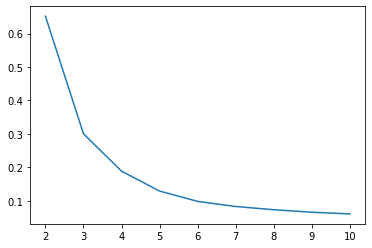

In [5]:
plt.plot(list(range(2,11)), inertias)

In [21]:
clusters = 4

In [22]:
X = (estab.sub(estab.mean(axis=1), axis=0)).to_numpy()
clusterer = TimeSeriesKMeans(n_clusters=clusters, metric="dtw", random_state=1729)
cluster_labels = clusterer.fit_predict(X)

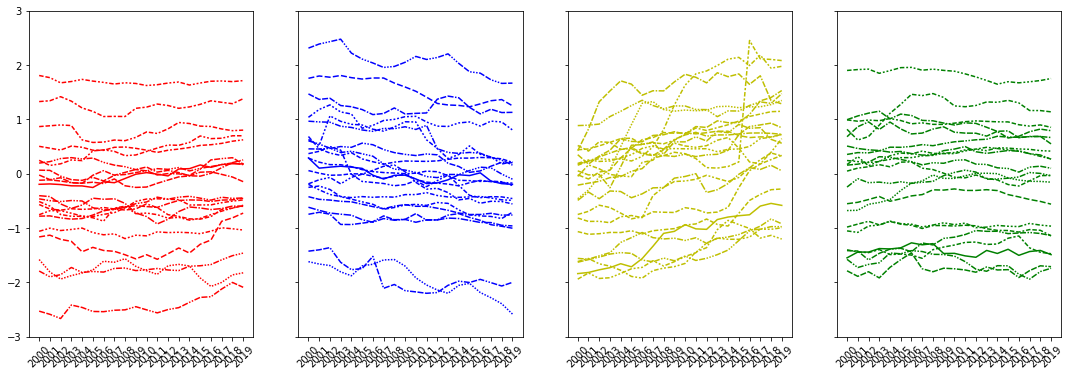

In [23]:
X_0 = estab[cluster_labels==0]
X_1 = estab[cluster_labels==1]
X_2 = estab[cluster_labels==2]
X_3 = estab[cluster_labels==3]
# plt.figure(figsize=(40, 6), dpi=80)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, clusters, sharey=True) #
#ax = fig.gca()
sns.lineplot(data=(X_0[::X_0.shape[0]//20]).T, palette=("r",), ax=ax1) #.iloc[::int(X_0.shape[0]/100)]
sns.lineplot(data=(X_1[::X_1.shape[0]//20]).T, palette=("b",), ax=ax2) #.iloc[::int(X_1.shape[0]/100)]
sns.lineplot(data=(X_2[::X_2.shape[0]//20]).T, palette=("y",), ax=ax3) #.iloc[::int(X_1.shape[0]/100)]
sns.lineplot(data=(X_3[::X_3.shape[0]//20]).T, palette=("g",), ax=ax4) #.iloc[::int(X_1.shape[0]/100)]
ax1.set_ylim([-3,3])
for ax in [ax1, ax2, ax3, ax4]: #
	ax.legend().set_visible(False)
	ax.tick_params('x', labelrotation=45)

fig.set_size_inches(18.5, 6)
plt.show()
winsound.Beep(440, 1000)

In [24]:
print(X_0.shape)
print(X_1.shape)
print(X_2.shape)
print(X_3.shape)

(1027, 20)
(750, 20)
(338, 20)
(913, 20)


In [25]:
print(X_0.std(axis=1).mean())
print(X_1.std(axis=1).mean())
print(X_2.std(axis=1).mean())
print(X_3.std(axis=1).mean())

0.11070764738717374
0.19297556836028137
0.31200909787047987
0.12587211163533002


### Use judgement of least stable clusters

In [26]:
estab_new_4 = pd.concat([X_1, X_2]).sort_index(level=0)
estab_new_4.to_csv("../data/processed/Unstable/estab.csv")

## EMP

In [27]:
emp = pd.read_csv("../data/processed/SAMI/emp.csv", index_col=[0,1])
emp

,,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Area Code,Area,,,,,,,,,,,,,,,,,,,,
45001,"Abbeville County, South Carolina",-0.367258,-0.511693,-0.682168,-0.791753,-0.738377,-0.641682,-0.744891,-0.891818,-0.916257,-1.133299,-1.111648,-1.107866,-1.058672,-1.156225,-1.153276,-1.143862,-1.101592,-1.123322,-1.121686,-1.092788
22001,"Acadia Parish, Louisiana",-1.170700,-1.183397,-1.206583,-1.245081,-1.273188,-1.148230,-1.101403,-1.010057,-0.888013,-0.938831,-0.947956,-0.963262,-0.993139,-1.065048,-1.116489,-1.187716,-1.283853,-1.241076,-1.223534,-1.242094
51001,"Accomack County, Virginia",0.177044,0.271255,0.390258,0.409326,0.388028,0.377928,0.390773,0.501466,0.536511,0.820965,0.785845,0.632377,0.552890,0.575811,0.532487,0.577200,0.618309,0.684444,0.710068,0.664520
16001,"Ada County, Idaho",1.052152,1.063876,1.029953,1.014247,1.036146,1.023431,1.036955,0.990757,0.933409,0.845832,0.815706,0.773632,0.754478,0.768590,0.727662,0.724556,0.744911,0.736020,0.761576,0.758489
19001,"Adair County, Iowa",0.794011,0.711742,0.944698,0.837925,0.726137,0.870665,0.849551,0.743468,0.827850,0.622054,0.657021,0.828724,0.873069,0.878708,0.801132,0.945681,1.053952,0.963183,0.958586,0.997536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4027,"Yuma County, Arizona",-0.665284,-0.482806,-0.402702,-0.339988,-0.262493,-0.230017,-0.254011,-0.294652,-0.345716,-0.426372,-0.449636,-0.516435,-0.453767,-0.484424,-0.500438,-0.519295,-0.503520,-0.556835,-0.550441,-0.559767
8125,"Yuma County, Colorado",0.669368,0.749793,0.840839,0.777122,0.770509,0.740007,0.860274,0.990740,1.062499,0.959851,0.890403,0.872521,0.846475,0.852461,0.866139,0.875702,0.839601,0.876625,0.999167,1.080113
48505,"Zapata County, Texas",-1.043419,-0.883897,-0.793905,-0.685573,-0.539317,-0.469345,-0.552759,-0.559410,-0.377719,-0.485307,-0.375704,0.079976,0.287709,0.375455,0.356325,-0.095576,-0.928608,-0.626599,-0.568945,-0.714737


### Do not run this cell it takes a very long time.

In [15]:
X = X = (emp.sub(emp.mean(axis=1), axis=0)).to_numpy()
range_n_clusters = list(range(2,7))
inertias = []

dist = cdist_dtw(X, n_jobs=-1, verbose=1)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 1 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", random_state=1729)
    cluster_labels = clusterer.fit_predict(X)
    inertias.append(clusterer.inertia_)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dist, cluster_labels, metric="precomputed")
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dist, cluster_labels, metric="precomputed")

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    plt.suptitle(
        "Silhouette analysis for TimeseriesKMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

duration = 1000
freq = 440
winsound.Beep(freq, duration)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 6026 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 7176 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 8426 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 9776 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 11226 tasks 

KeyboardInterrupt: 

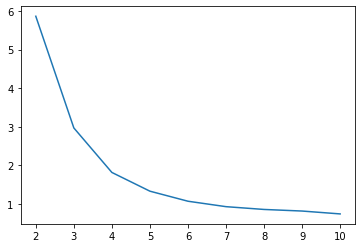

In [11]:
plt.plot(list(range(2,11)), inertias)

In [28]:
clusters=3

In [29]:
X = (emp.sub(emp.mean(axis=1), axis=0)).to_numpy()
clusterer = TimeSeriesKMeans(n_clusters=clusters, metric="dtw", random_state=1729)
cluster_labels = clusterer.fit_predict(X)

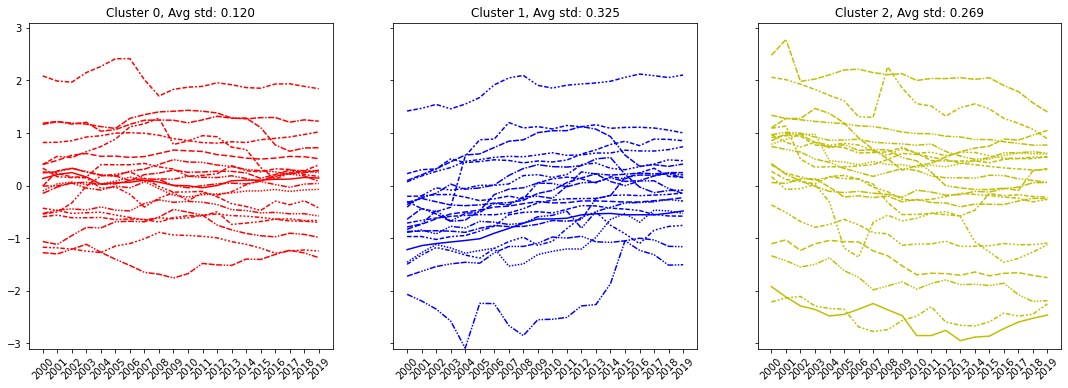

In [30]:
X_0 = emp[cluster_labels==0]
X_1 = emp[cluster_labels==1]
X_2 = emp[cluster_labels==2]
fig, (ax1, ax2, ax3) = plt.subplots(1, clusters, sharey=True) #
#ax = fig.gca()
sns.lineplot(data=(X_0[::X_0.shape[0]//20]).T, palette=("r",), ax=ax1) #
sns.lineplot(data=(X_1[::X_1.shape[0]//20]).T, palette=("b",), ax=ax2) #
sns.lineplot(data=(X_2[::X_2.shape[0]//20]).T, palette=("y",), ax=ax3) #
ax1.set_ylim([-3.1,3.1])
for i, (ax, X) in enumerate(zip([ax1, ax2, ax3], [X_0, X_1, X_2])): #
	ax.legend().set_visible(False)
	ax.tick_params('x', labelrotation=45)
	std = (X.std(axis=1)).mean()
	ax.set_title(f"Cluster {i}, Avg std: {std:.3f}")

fig.set_size_inches(18.5, 6)
plt.show()
winsound.Beep(440, 1000)

In [31]:
print(X_0.shape)
print(X_1.shape)
print(X_2.shape)

(1886, 20)
(450, 20)
(686, 20)


In [32]:
print(X_0.std(axis=1).mean())
print(X_1.std(axis=1).mean())
print(X_2.std(axis=1).mean())

0.11992954390227492
0.3246796073172826
0.26912470999948973


### Use judgement of least stable clusters

In [33]:
emp_new_3 = pd.concat([X_1, X_2]).sort_index(level=0)
emp_new_3.to_csv("../data/processed/Unstable/emp.csv")

## WAGE

In [34]:
wage = pd.read_csv("../data/processed/SAMI/wage.csv", index_col=[0,1])
wage

,,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Area Code,Area,,,,,,,,,,,,,,,,,,,,
45001,"Abbeville County, South Carolina",-0.327676,-0.529571,-0.625400,-0.652409,-0.607052,-0.585624,-0.690702,-0.888580,-0.937194,-1.074847,-1.111622,-1.103628,-1.075874,-1.047591,-0.993988,-1.056635,-0.976281,-0.966703,-0.952798,-0.893735
22001,"Acadia Parish, Louisiana",-1.536618,-1.500516,-1.455664,-1.505392,-1.487604,-1.111706,-1.065853,-1.010271,-0.743999,-0.877057,-0.925430,-0.880966,-0.930996,-1.013814,-1.127227,-1.292990,-1.426030,-1.381125,-1.321390,-1.399437
51001,"Accomack County, Virginia",-0.341003,-0.178038,-0.052997,0.072994,0.101271,0.112120,0.071438,0.155780,0.226469,0.494258,0.478814,0.262702,0.284860,0.291593,0.276994,0.324052,0.370744,0.462808,0.502935,0.438018
16001,"Ada County, Idaho",1.167995,0.981507,0.931197,0.880975,0.917633,0.906206,0.970190,0.893068,0.750541,0.681629,0.661108,0.601502,0.560534,0.614034,0.618133,0.576911,0.603284,0.649789,0.683141,0.680656
19001,"Adair County, Iowa",0.838440,0.773009,0.873118,0.892438,0.822020,0.892169,0.792059,0.652648,0.690289,0.515874,0.571838,0.680447,0.663552,0.641237,0.695219,0.797514,0.982162,0.836926,0.812756,0.880620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4027,"Yuma County, Arizona",-1.347888,-1.173219,-1.068037,-0.948001,-0.838303,-0.775593,-0.773557,-0.734087,-0.731140,-0.724594,-0.776787,-0.832759,-0.800069,-0.816536,-0.832479,-0.851045,-0.861451,-0.830374,-0.807822,-0.815518
8125,"Yuma County, Colorado",0.411541,0.572179,0.640112,0.638570,0.661753,0.761169,0.911379,1.108137,1.182368,1.043548,0.893291,0.878499,0.837008,0.885946,0.888548,0.920827,0.804446,0.826407,0.953137,1.017881
48505,"Zapata County, Texas",-0.929723,-0.516321,-0.555277,-0.352500,-0.320545,-0.051558,0.246997,0.396791,0.274908,0.020589,0.476392,0.960542,1.328823,1.315799,1.301986,0.620081,-0.199966,0.135352,0.247450,0.189088


### Do not run this cell it takes a very long time.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 6026 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 7176 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 8426 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 9776 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 11226 tasks 

For n_clusters = 2 The average silhouette_score is : 0.33741329038745144
For n_clusters = 3 The average silhouette_score is : 0.3263175755262241
For n_clusters = 4 The average silhouette_score is : 0.2799602001802539
For n_clusters = 5 The average silhouette_score is : 0.2345257016483771
For n_clusters = 6 The average silhouette_score is : 0.2474085318880531
For n_clusters = 7 The average silhouette_score is : 0.23099593735968046
For n_clusters = 8 The average silhouette_score is : 0.21170424452037845
For n_clusters = 9 The average silhouette_score is : 0.20288518266613845
For n_clusters = 10 The average silhouette_score is : 0.20117516166682034


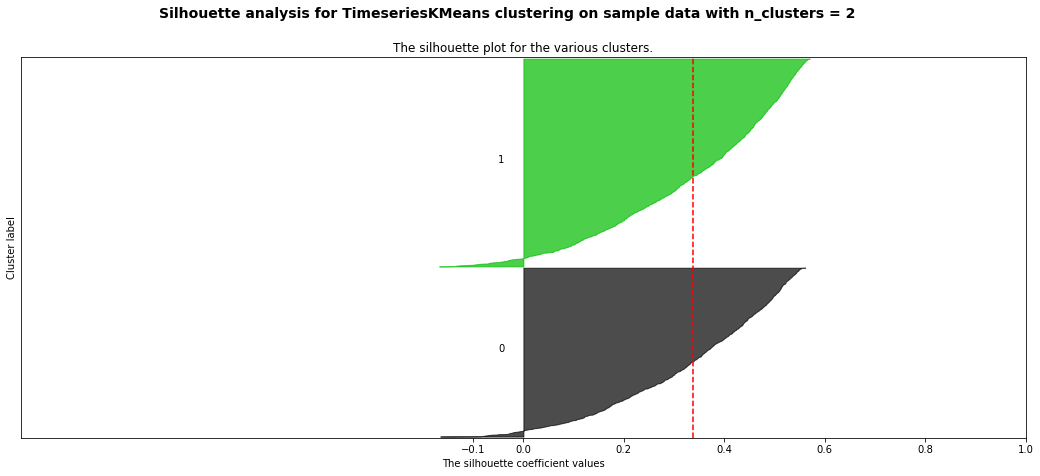

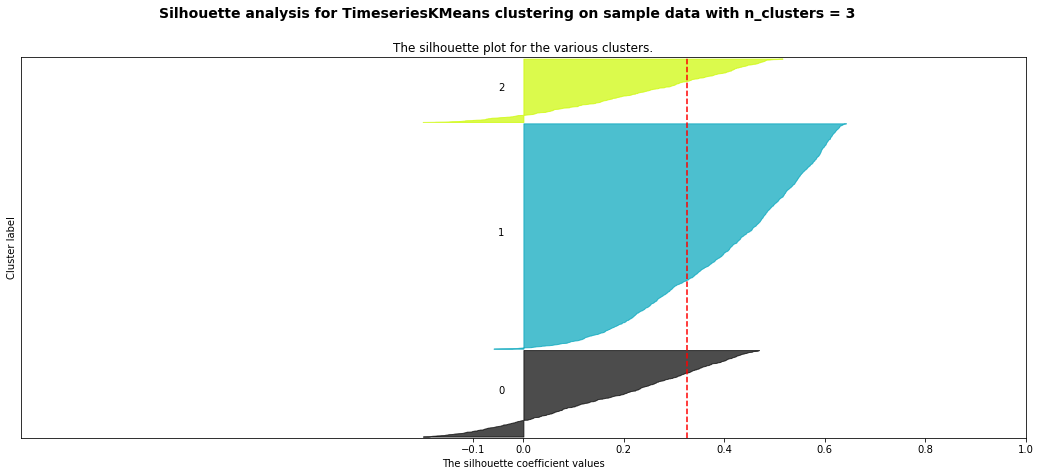

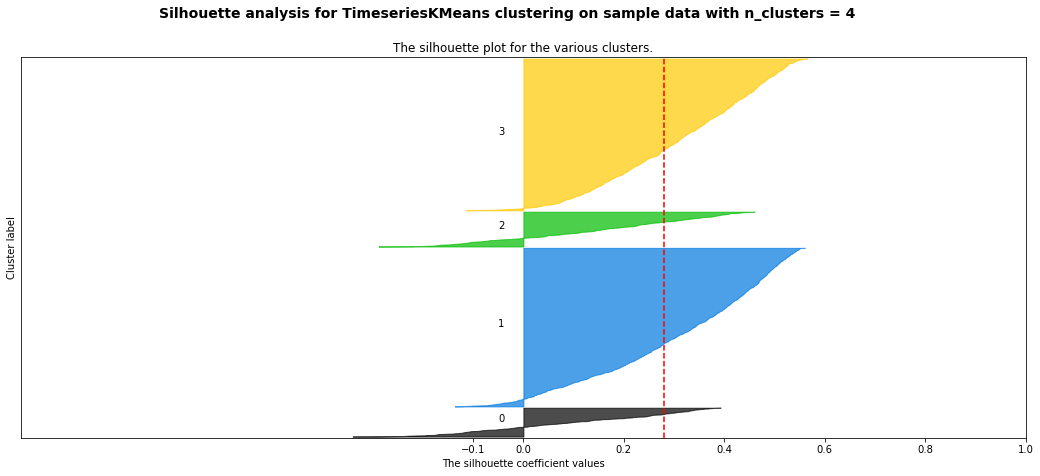

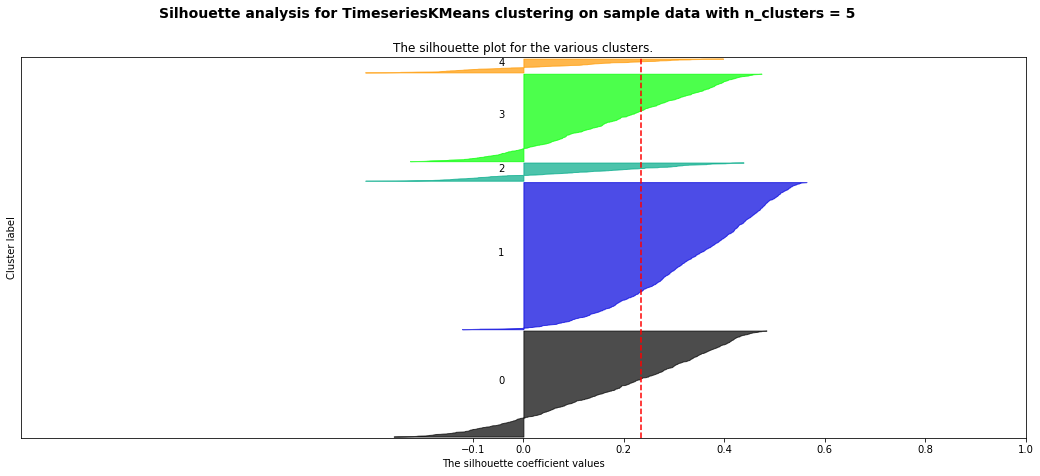

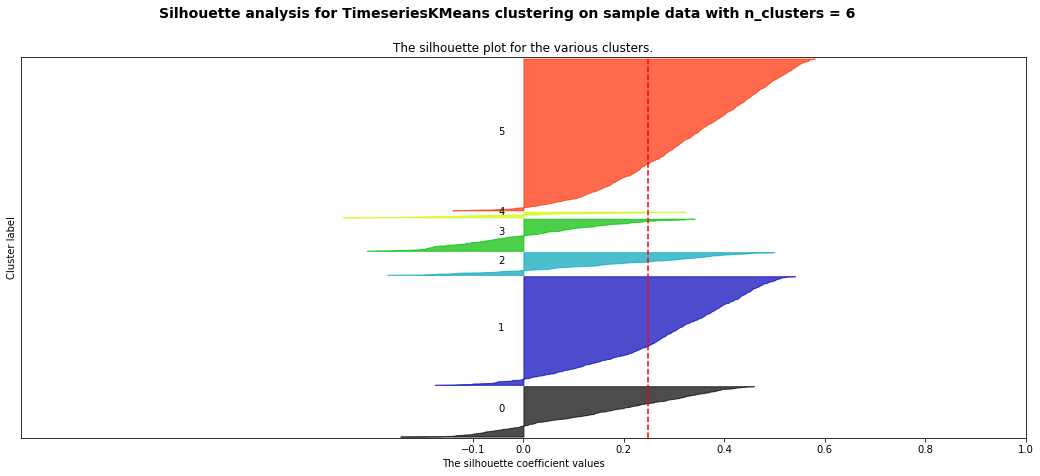

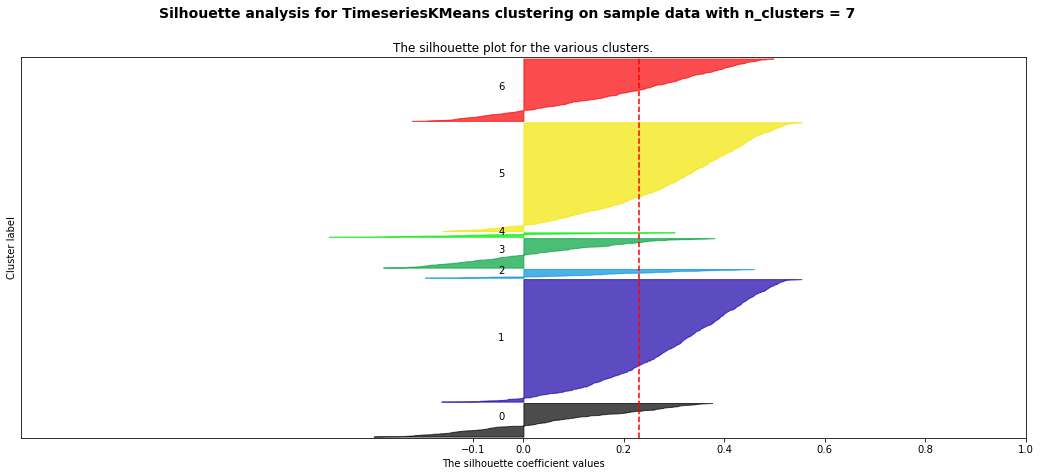

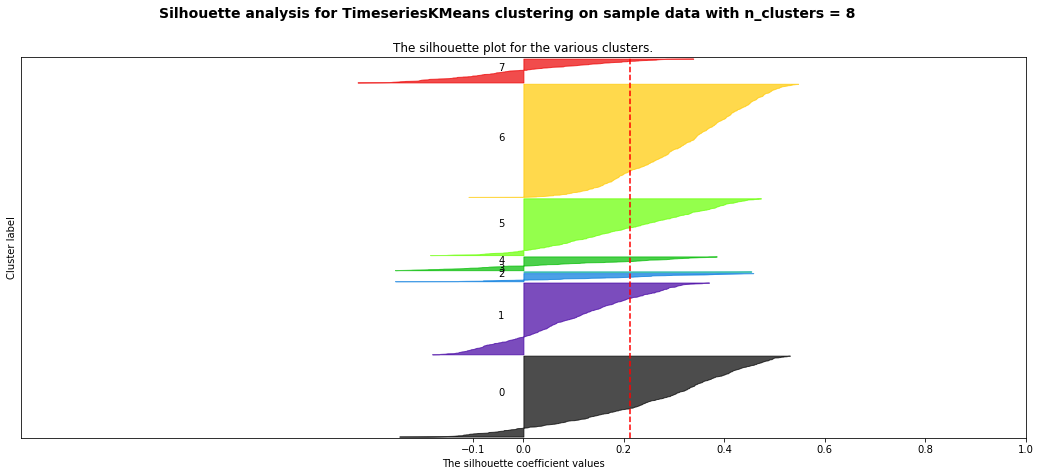

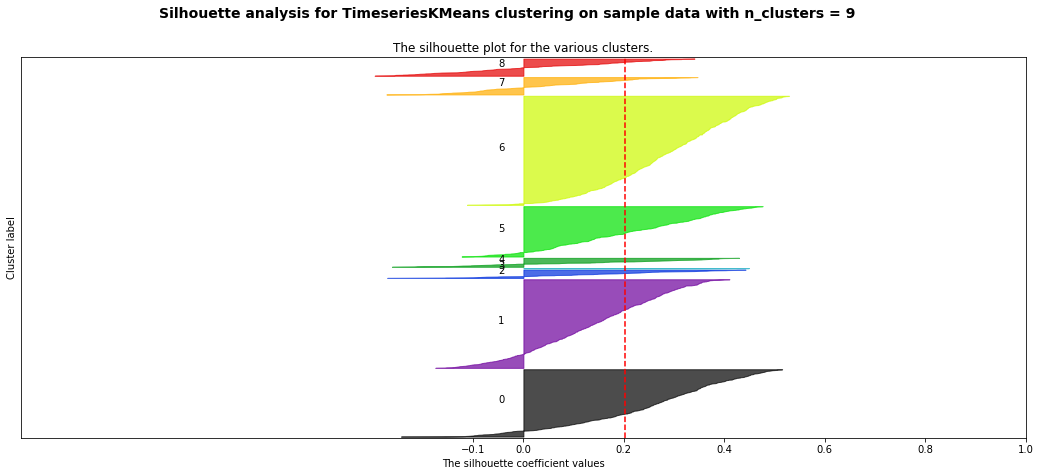

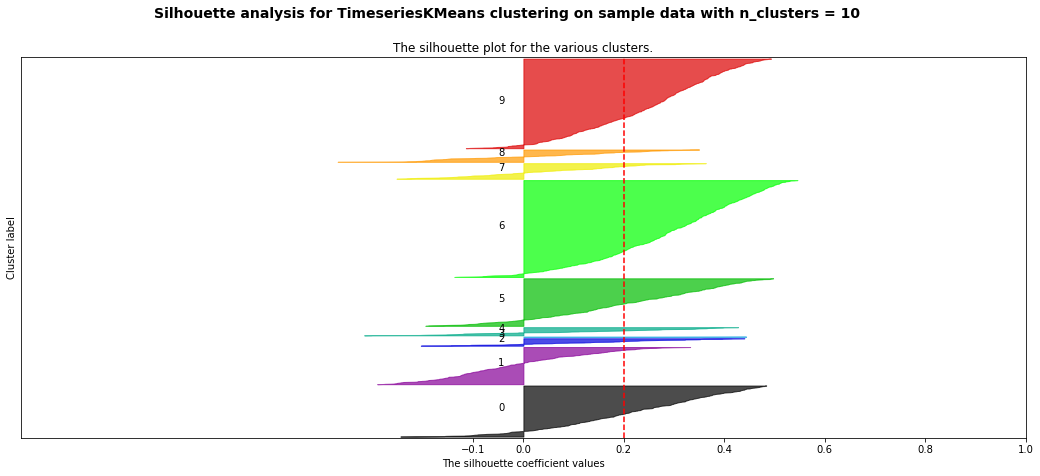

In [11]:
X = (wage.sub(wage.mean(axis=1), axis=0)).to_numpy()
range_n_clusters = list(range(2,7))
inertias = []

dist = cdist_dtw(X, n_jobs=-1, verbose=1)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 1 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", random_state=1729)
    cluster_labels = clusterer.fit_predict(X)
    inertias.append(clusterer.inertia_)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dist, cluster_labels, metric="precomputed")
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dist, cluster_labels, metric="precomputed")

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    plt.suptitle(
        "Silhouette analysis for TimeseriesKMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

duration = 1000
freq = 440
winsound.Beep(freq, duration)

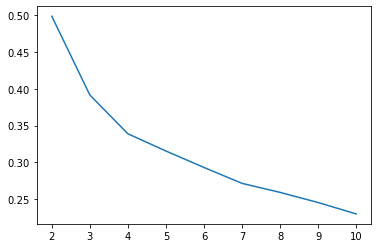

In [18]:
plt.plot(list(range(2,11)), inertias)

In [35]:
clusters = 3

In [36]:
X = (wage.sub(wage.mean(axis=1), axis=0)).to_numpy()
clusterer = TimeSeriesKMeans(n_clusters=clusters, metric="dtw", random_state=1729)
cluster_labels = clusterer.fit_predict(X)

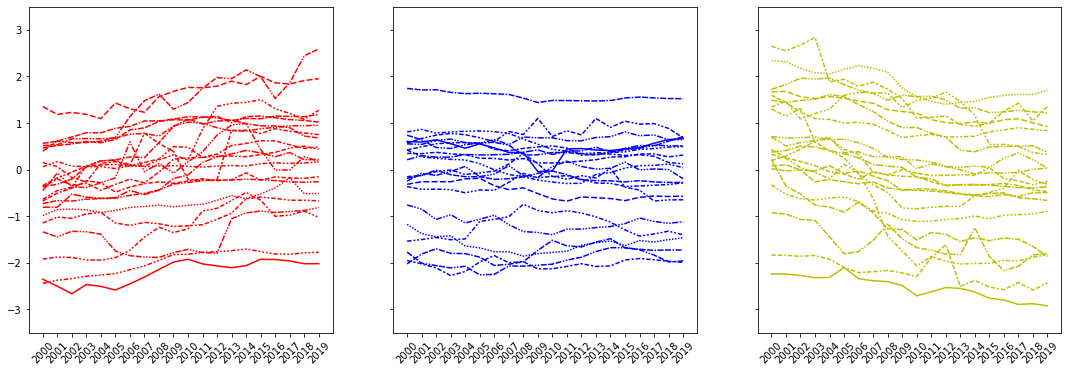

In [37]:
X_0 = wage[cluster_labels==0]
X_1 = wage[cluster_labels==1]
X_2 = wage[cluster_labels==2]
# X_3 = wage[cluster_labels==3]
fig, (ax1, ax2, ax3) = plt.subplots(1, clusters, sharey=True) #, ax4
#ax = fig.gca()
sns.lineplot(data=(X_0[::X_0.shape[0]//20]).T, palette=("r",), ax=ax1)
sns.lineplot(data=(X_1[::X_1.shape[0]//20]).T, palette=("b",), ax=ax2)
sns.lineplot(data=(X_2[::X_2.shape[0]//20]).T, palette=("y",), ax=ax3)
# sns.lineplot(data=(X_3[::X_3.shape[0]//20]).T, palette=("g",), ax=ax4)
ax1.set_ylim([-3.5,3.5])
for ax in [ax1, ax2, ax3]: #, ax4
	ax.legend().set_visible(False)
	ax.tick_params('x', labelrotation=45)

fig.set_size_inches(18.5, 6)
plt.show()
winsound.Beep(440, 1000)

In [38]:
print(X_0.shape)
print(X_1.shape)
print(X_2.shape)

(695, 20)
(1809, 20)
(509, 20)


In [39]:
print(X_0.std(axis=1).mean())
print(X_1.std(axis=1).mean())
print(X_2.std(axis=1).mean())

0.31109606417524666
0.13466734582013712
0.3423382381404083


In [40]:
wage_new_3 = pd.concat([X_0, X_2]).sort_index(level=0)
wage_new_3.to_csv("../data/processed/Unstable/wage.csv")